In [1]:
import cv2
import torch.nn
from PIL import Image
from  sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
#from google.colab.patches import cv2_imshow
import os
import shutil
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models
import seaborn as sns
import random
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from sklearn.metrics import confusion_matrix

Creating a training , test and validation sets 

In [2]:
root_dir='./Icecream-dataset'
brands=['/bj/images','/breyers/images','/hd/images','/talenti/images']
train_images=[]
test_images=[]
valid_images=[]
train_dir=[]
test_dir=[]
valid_dir=[]
train_filenames={}
test_filenames={}
valid_filenames={}
for i in range(4):
    
    train_dir.append(root_dir+'/train'+brands[i])
    test_dir.append(root_dir+'/test'+brands[i])
    valid_dir.append(root_dir+'/valid'+brands[i]);
    if not os.path.exists(train_dir[i]):
        os.makedirs(train_dir[i])
    if not os.path.exists(test_dir[i]):    
        os.makedirs(test_dir[i])
    if not os.path.exists(valid_dir[i]):
        os.makedirs(valid_dir[i])
    
    current_folder=brands[i]
    src=root_dir+current_folder
    
    if os.path.exists(src):
        print("HI")
        allFileNames=os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, test_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])


        train_FileNames1 = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames1 = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames1 = [src+'/' + name for name in test_FileNames.tolist()]
        train_images.append(len(train_FileNames))
        test_images.append(len(test_FileNames))
        valid_images.append(len(val_FileNames))
        train_filenames[brands[i]]=[root_dir+'/train'+current_folder+'/'+ name for name in train_FileNames.tolist()]
        test_filenames[brands[i]]=[root_dir+'/test'+current_folder+'/'+ name for name in test_FileNames.tolist()]
        valid_filenames[brands[i]]=[root_dir+'/valid'+current_folder+'/'+ name for name in val_FileNames.tolist()]
        for name in train_FileNames1:
            shutil.copy(name,train_dir[i])

        for name in val_FileNames1:
            shutil.copy(name,valid_dir[i])

        for name in test_FileNames1:
            shutil.copy(name,test_dir[i])
        print(src)
    

shutil.rmtree(root_dir+'/bj')
shutil.rmtree(root_dir+'/breyers')
shutil.rmtree(root_dir+'/hd')
shutil.rmtree(root_dir+'/talenti')

HI
./Icecream-dataset/bj/images
HI
./Icecream-dataset/breyers/images
HI
./Icecream-dataset/hd/images
HI
./Icecream-dataset/talenti/images


In [3]:
print(test_images)

[8, 10, 10, 7]


In [4]:
train_dir

['./Icecream-dataset/train/bj/images',
 './Icecream-dataset/train/breyers/images',
 './Icecream-dataset/train/hd/images',
 './Icecream-dataset/train/talenti/images']

Loading image data from folders

/Users/vaishalilalit/anaconda3/lib/python3.11/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


torch.Size([3, 224, 224])


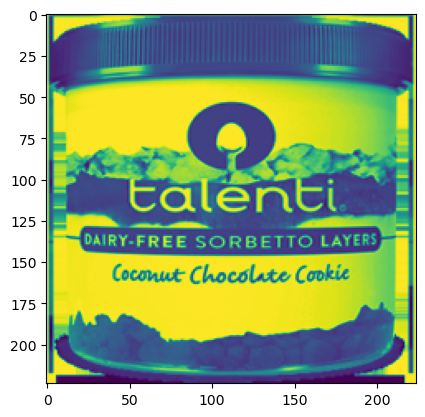

In [5]:
count=0
img_train_tensors=[]
img_labels=[]
labels=[0,1,2,3]
for i in range(4):
    for j in range(train_images[i]):
        img_train=Image.open(train_filenames[brands[i]][j]) 
        num_channels_train = len(img_train.getbands())
        if num_channels_train < 3 or num_channels_train>3:
# Convert grayscale to RGB
            img_train = img_train.convert("RGB")
        resize = transforms.Resize((224 , 224))
        resized_img_train = resize(img_train)
        convert_tensor = transforms.ToTensor()
        img_train_tensors.append(convert_tensor(resized_img_train))
        img_labels.append(labels[i])

print(img_train_tensors[165].size())
plt.imshow(img_train_tensors[165][0])


torch.Size([3, 224, 224])


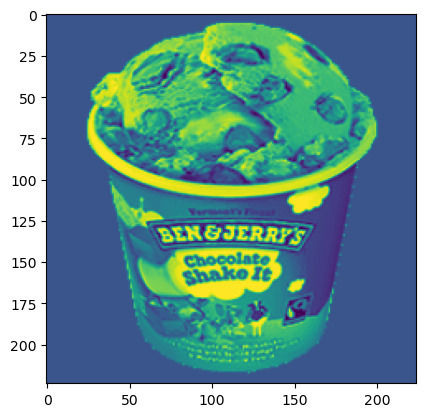

In [6]:
count=0
img_test_tensors=[]
img_test_labels=[]
labels=[0,1,2,3]
for i in range(4):
    for j in range(test_images[i]):
        img_test=Image.open(test_filenames[brands[i]][j])
        num_channels_test = len(img_test.getbands())
        if num_channels_test < 3 or num_channels_test>3:
# Convert grayscale to RGB
            img_test = img_test.convert("RGB")

        resize = transforms.Resize((224 , 224))
        resized_img_test = resize(img_test)
        convert_tensor = transforms.ToTensor()
        img_test_tensors.append(convert_tensor(resized_img_test))
        img_test_labels.append(labels[i])

print(img_test_tensors[0].size())
plt.imshow(img_test_tensors[0][0])


torch.Size([3, 224, 224])


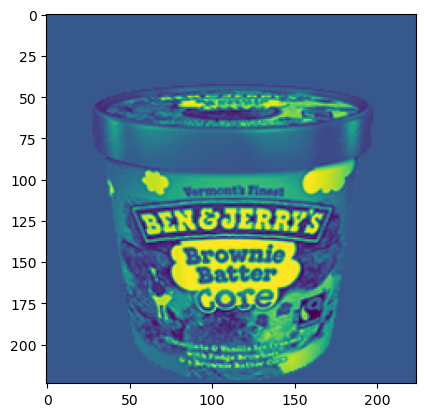

In [7]:
count=0
img_valid_tensors=[]
img_valid_labels=[]
labels=[0,1,2,3]
for i in range(4):
    for j in range(valid_images[i]):
        img_valid=Image.open(valid_filenames[brands[i]][j])
        num_channels_valid = len(img_valid.getbands())
        if num_channels_valid < 3 or num_channels_valid>3:
# Convert grayscale to RGB
            img_valid = img_valid.convert("RGB")
        resize = transforms.Resize((224 , 224))
        resized_img_valid = resize(img_valid)
        convert_tensor = transforms.ToTensor()
        img_valid_tensors.append(convert_tensor(resized_img_valid))
        img_valid_labels.append(labels[i])
        

print(img_valid_tensors[0].size())
plt.imshow(img_valid_tensors[0][0])

In [8]:
# Import alexNet
alexNet = torchvision.models.alexnet(pretrained=True)

/Users/vaishalilalit/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vaishalilalit/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
alexNet
print(alexNet)
# Modify the last fully connected layer
num_classes = 4  # Change this to your desired number of classes
original_features = alexNet.classifier[6].in_features
alexNet.classifier[6] = nn.Linear(original_features, num_classes)
# Print the modified architecture
print(alexNet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [10]:
class CustomDataset(Dataset):
    def __init__(self, img_train_tensors, img_labels, transform=None):
        self.image_tensors = img_train_tensors
        self.labels = img_labels
        self.transform = transform

    def __len__(self):
        return len(self.image_tensors)

    def __getitem__(self, index):
        image = self.image_tensors[index]
        label = self.labels[index]

        if self.transform:
            image = self.transform(image)

        return image, label

In [11]:
augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=90),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomAffine(degrees=20, translate=(0.05, 0.05), scale=(0.9, 1.1), shear=15),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.5),
])
# Apply data augmentation to the training set
augmented_train_dataset = CustomDataset(img_train_tensors, img_labels, transform=augmentation_transforms)
augmented_test_dataset = CustomDataset(img_test_tensors, img_test_labels, transform=None)
augmented_valid_dataset=CustomDataset(img_valid_tensors, img_valid_labels, transform=None)
# Create a DataLoader for batching and shuffling (if needed)
batch_size = 1
augmented_train_data_loader = DataLoader(augmented_train_dataset, batch_size=batch_size, shuffle=True)
augmented_test_data_loader = DataLoader(augmented_test_dataset, batch_size=batch_size, shuffle=True)
augmented_valid_data_loader = DataLoader(augmented_valid_dataset, batch_size=batch_size, shuffle=True)

In [12]:
data, labels = next(iter(augmented_valid_data_loader))
# len(augmented_test_data_loader)
print(data.shape)

torch.Size([1, 3, 224, 224])


In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=alexNet.parameters(), lr=0.001)


In [14]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    best_val_loss = float('inf')
    train_loss = 0
    loss1=[]
    for bat,batch in enumerate(data_loader):
        images, labels = batch
        labels = labels.to(torch.int64)
        alexNet.train() 
        y_pred = model(images)        
        loss=loss_fn(y_pred,labels)
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(alexNet.parameters(), max_norm=1)
        optimizer.step()
        # Print out how many samples have been seen
        if bat % 20 == 0:
            print(f"Looked at {bat * len(images)}/{len(augmented_train_data_loader.dataset)} samples")
    train_loss /= len(augmented_train_data_loader)    
    print(f"\nTrain loss: {train_loss}")   
    val_loss = 0
    correct_predictions = 0
    total_predictions = 0    
    alexNet.eval()    
    with torch.no_grad():
        for batch in augmented_valid_data_loader:
            images, labels = batch
            labels = labels.to(torch.int64)
            val_pred = alexNet(images)
            val_loss += loss_fn(val_pred, labels)
            
            predicted_labels = torch.argmax(val_pred, dim=1)
            correct_predictions += torch.sum(predicted_labels == labels).item()
            total_predictions += len(labels)            
#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#     else:
#         print(f'Early stopping at epoch {epoch}')
#         break
    val_loss /= len(augmented_valid_data_loader)
    accuracy = correct_predictions / total_predictions
    print(f"\nValidation loss: {val_loss:.5f}")
    print(f"Validation accuracy: {accuracy * 100:.2f}%")
    
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module):
    test_loss=0
    correct_predictions = 0  # Initialize with a default value
    total_predictions = 0
    alexNet.eval()
    # Using torch.no_grad() instead of torch.inference_mode()
    with torch.no_grad():
        for batch in data_loader:
            images, labels = batch
            labels = labels.to(torch.int64)

            # 1. Forward pass
            test_pred = model(images)
#             print(test_pred)
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, labels)  # accumulatively add up the loss per epoch
            predicted_labels = torch.argmax(test_pred, dim=1)
            print(predicted_labels,labels)
            correct_predictions += torch.sum(predicted_labels == labels).item()
            total_predictions += len(labels)

            # 3. Calculate accuracy (preds need to be the same as y_true)
            # Update accuracy calculation based on your method
            # test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen outside the loop
        # Divide total test loss by the length of the test dataloader (per batch)
        test_loss /= len(data_loader)

        # Divide total accuracy by the length of the test dataloader (per batch)
        # Update accuracy calculation based on your method
    accuracy = correct_predictions / total_predictions

    print(f"Accuracy: {accuracy * 100:.2f}%")
    ## Print out what's happening
    print(f"\nTest loss: {test_loss:.5f}")
    # Print accuracy if needed
    # print(f"Test accuracy: {accuracy:.5f}")

In [15]:
epochs = 10
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=augmented_train_data_loader, 
        model=alexNet, 
        loss_fn=loss_fn,
        optimizer=optimizer
    )
    test_step(data_loader=augmented_test_data_loader,
        model=alexNet,
        loss_fn=loss_fn
    )

Epoch: 0
---------
Looked at 0/166 samples
Looked at 20/166 samples
Looked at 40/166 samples
Looked at 60/166 samples
Looked at 80/166 samples
Looked at 100/166 samples
Looked at 120/166 samples
Looked at 140/166 samples
Looked at 160/166 samples

Train loss: 1.3428361415863037

Validation loss: 1.12925
Validation accuracy: 57.89%
tensor([[ 1.1620, -0.1151,  0.8816,  0.3369]])
tensor([0]) tensor([0])
tensor([[0.7497, 0.9047, 0.9550, 0.2048]])
tensor([2]) tensor([3])
tensor([[ 0.6566, -0.9907,  1.2495, -0.1069]])
tensor([2]) tensor([0])
tensor([[-0.0896, -0.0254,  0.3798, -1.0416]])
tensor([2]) tensor([2])
tensor([[ 1.1949, -1.0274,  1.3126, -0.3823]])
tensor([2]) tensor([0])
tensor([[ 0.3775,  1.1455, -0.0645, -0.3043]])
tensor([1]) tensor([1])
tensor([[0.5081, 0.4408, 0.5312, 0.0215]])
tensor([2]) tensor([3])
tensor([[ 0.5021, -0.5945,  1.0062, -0.0259]])
tensor([2]) tensor([0])
tensor([[ 1.0655, -0.7359,  1.0748,  0.1291]])
tensor([2]) tensor([0])
tensor([[ 0.2248,  0.4985,  0.0711, 

Looked at 20/166 samples
Looked at 40/166 samples
Looked at 60/166 samples
Looked at 80/166 samples
Looked at 100/166 samples
Looked at 120/166 samples
Looked at 140/166 samples
Looked at 160/166 samples

Train loss: 0.7589378356933594

Validation loss: 0.58848
Validation accuracy: 97.37%
tensor([[ 1.3674,  0.0030,  0.5554, -0.7949]])
tensor([0]) tensor([0])
tensor([[ 0.0234,  1.7518, -0.7682, -0.4679]])
tensor([1]) tensor([1])
tensor([[ 1.5291, -0.5371,  0.9606, -0.7975]])
tensor([0]) tensor([0])
tensor([[-0.3515,  0.7352, -0.0216,  0.8755]])
tensor([3]) tensor([3])
tensor([[-0.2789, -0.2642,  1.5521, -0.4593]])
tensor([2]) tensor([2])
tensor([[-0.1493, -0.3062,  1.3121, -1.6360]])
tensor([2]) tensor([2])
tensor([[ 0.3078,  1.9521, -0.8346, -0.6928]])
tensor([1]) tensor([1])
tensor([[ 1.6901, -1.0536,  0.9860, -0.5938]])
tensor([0]) tensor([0])
tensor([[-0.1134,  1.4366, -0.5912, -0.1444]])
tensor([1]) tensor([1])
tensor([[0.5327, 1.3219, 0.6401, 0.5978]])
tensor([1]) tensor([3])
tens

tensor([[ 0.2489,  0.4121,  1.3027, -1.1307]])
tensor([2]) tensor([2])
tensor([[-0.2006,  2.2452, -1.1971, -0.0606]])
tensor([1]) tensor([1])
tensor([[-0.6594, -0.5883,  2.3675, -0.4927]])
tensor([2]) tensor([2])
Accuracy: 97.14%

Test loss: 0.33570
Epoch: 6
---------
Looked at 0/166 samples
Looked at 20/166 samples
Looked at 40/166 samples
Looked at 60/166 samples
Looked at 80/166 samples
Looked at 100/166 samples
Looked at 120/166 samples
Looked at 140/166 samples
Looked at 160/166 samples

Train loss: 0.3876761794090271

Validation loss: 0.25261
Validation accuracy: 97.37%
tensor([[ 7.8725e-04,  4.6390e-01, -6.5218e-01,  3.0942e+00]])
tensor([3]) tensor([3])
tensor([[ 3.0343, -1.3984,  0.4540, -0.7141]])
tensor([0]) tensor([0])
tensor([[-0.7729,  3.3613, -1.9333, -0.1841]])
tensor([1]) tensor([1])
tensor([[-0.0936,  0.3125, -1.1674,  2.1155]])
tensor([3]) tensor([3])
tensor([[ 0.4052, -0.6768,  3.1948, -1.1597]])
tensor([2]) tensor([2])
tensor([[0.3153, 1.8362, 0.1260, 1.1843]])
ten

tensor([[-1.0198,  0.5014,  2.4258, -1.0387]])
tensor([2]) tensor([2])
tensor([[ 0.1100,  0.6102,  1.8742, -1.3993]])
tensor([2]) tensor([2])
Accuracy: 94.29%

Test loss: 0.14055
Epoch: 9
---------
Looked at 0/166 samples
Looked at 20/166 samples
Looked at 40/166 samples
Looked at 60/166 samples
Looked at 80/166 samples
Looked at 100/166 samples
Looked at 120/166 samples
Looked at 140/166 samples
Looked at 160/166 samples

Train loss: 0.26620298624038696

Validation loss: 0.10080
Validation accuracy: 100.00%
tensor([[-0.7167, -0.8315,  2.9775, -0.1481]])
tensor([2]) tensor([2])
tensor([[-0.1226,  0.0677, -1.5007,  3.6562]])
tensor([3]) tensor([3])
tensor([[-1.0307,  0.2089, -1.5206,  3.5811]])
tensor([3]) tensor([3])
tensor([[-1.0624,  5.6105, -2.0204,  0.2059]])
tensor([1]) tensor([1])
tensor([[ 0.3334,  5.4717, -3.9779,  0.1853]])
tensor([1]) tensor([1])
tensor([[ 0.0699,  0.8152,  1.8941, -1.4884]])
tensor([2]) tensor([2])
tensor([[-0.5209,  4.2777, -3.2021,  0.4976]])
tensor([1]) t

In [20]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module):
 
    loss, acc = 0, 0
    all_true_labels=[]
    all_predicted_labels=[]
    correct_predictions,total_predictions=0,0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)           
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            predicted_labels = torch.argmax(y_pred, dim=1)
            correct_predictions += torch.sum(predicted_labels == y).item()
            total_predictions += len(y)
            all_true_labels.extend(y.cpu().numpy())
            all_predicted_labels.extend(predicted_labels.cpu().numpy())
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc =correct_predictions/total_predictions
        

# Assuming y_true contains the true labels and y_pred contains the predicted labels
        conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)
        
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc,
            "conf_matrix":conf_matrix}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=alexNet, data_loader=augmented_test_data_loader,
    loss_fn=loss_fn
)
model_0_results

{'model_name': 'AlexNet',
 'model_loss': 0.12271353602409363,
 'model_acc': 0.9428571428571428,
 'conf_matrix': array([[ 8,  0,  0,  0],
        [ 0,  9,  0,  1],
        [ 0,  0, 10,  0],
        [ 0,  1,  0,  6]])}

In [21]:
pwd

'/Users/vaishalilalit/Downloads'

In [53]:
i1=Image.open('./i1.jpeg')
i2=Image.open('./i2.jpeg')
i3=Image.open('./i3.jpeg')
i4=Image.open('./i4.jpeg')

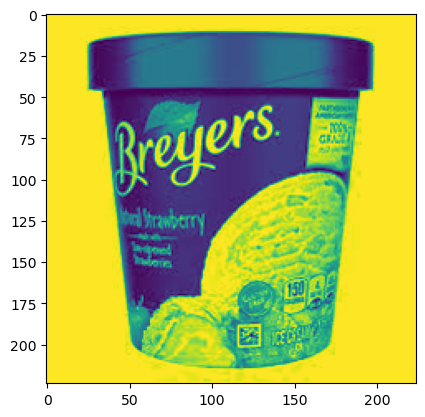

In [78]:

i1=Image.open('./i1.jpeg')
i2=Image.open('./i2.jpeg')
i3=Image.open('./i3.jpeg')
i4=Image.open('./i4.jpeg')




i1=i1.convert("RGB")
i1=i1.resize((224,224))
i1=convert_tensor(i1)
i2=convert_tensor(i2)
i3=convert_tensor(i3)
i4=convert_tensor(i4)
i1.size()
plt.imshow(i1[0])
image_ten=[i1, i2, i3, i4]
image_ten_label=[1,0,2,3]

In [79]:
image_ten_=CustomDataset(image_ten,image_ten_label,transform=None)
test_data_loader = DataLoader(image_ten_, batch_size=batch_size, shuffle=True)

In [80]:
model_0_results = eval_model(model=alexNet, data_loader=test_data_loader,
    loss_fn=loss_fn
)

In [81]:
model_0_results

{'model_name': 'AlexNet',
 'model_loss': 0.13992488384246826,
 'model_acc': 1.0,
 'conf_matrix': array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])}